<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.255964,87.435988,0.004954,129.696906,129.692561,0.004345
1,0.0,1.0,20.750776,60.696459,0.002638,91.449873,91.447660,0.002213
2,0.0,2.0,54.279467,87.600880,0.006578,151.886925,151.881144,0.005781
3,0.0,3.0,94.036256,48.338421,-0.005710,152.368967,152.375685,-0.006718
4,0.0,4.0,64.062826,62.566620,-0.009626,136.619819,136.630244,-0.010425
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,91.024055,79.451921,0.009201,180.485177,180.477539,0.007638
119996,999.0,116.0,62.618661,31.961619,0.021091,104.601372,104.574810,0.026562
119997,999.0,117.0,20.662074,30.715533,-0.019818,61.357789,61.370783,-0.012994
119998,999.0,118.0,64.040928,42.009746,-0.025930,116.024743,116.046561,-0.021818


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.255964,87.435988,0.004954,129.696906,129.692561,0.004345
1,0.0,1.0,20.750776,60.696459,0.002638,91.449873,91.447660,0.002213
2,0.0,2.0,54.279467,87.600880,0.006578,151.886925,151.881144,0.005781
3,0.0,3.0,94.036256,48.338421,-0.005710,152.368967,152.375685,-0.006718
4,0.0,4.0,64.062826,62.566620,-0.009626,136.619819,136.630244,-0.010425
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,91.024055,79.451921,0.009201,180.485177,180.477539,0.007638
119996,999.0,116.0,62.618661,31.961619,0.021091,104.601372,104.574810,0.026562
119997,999.0,117.0,20.662074,30.715533,-0.019818,61.357789,61.370783,-0.012994
119998,999.0,118.0,64.040928,42.009746,-0.025930,116.024743,116.046561,-0.021818


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    32.255964  87.435988  0.004954  129.696906  129.692561  0.004345
      1.0    20.750776  60.696459  0.002638   91.449873   91.447660  0.002213
      2.0    54.279467  87.600880  0.006578  151.886925  151.881144  0.005781
      3.0    94.036256  48.338421 -0.005710  152.368967  152.375685 -0.006718
      4.0    64.062826  62.566620 -0.009626  136.619819  136.630244 -0.010425
...                ...        ...       ...         ...         ...       ...
999.0 115.0  91.024055  79.451921  0.009201  180.485177  180.477539  0.007638
      116.0  62.618661  31.961619  0.021091  104.601372  104.574810  0.026562
      117.0  20.662074  30.715533 -0.019818   61.357789   61.370783 -0.012994
      118.0  64.040928  42.009746 -0.025930  116.024743  116.046561 -0.021818
      119.0  25.208585  72.472295 -0.006351  107.674529  107.679662 -0.005133

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    32.255964  87.435988  0.004954  129.696906  129.692561  0.004345
      1.0    20.750776  60.696459  0.002638   91.449873   91.447660  0.002213
      2.0    54.279467  87.600880  0.006578  151.886925  151.881144  0.005781
      3.0    94.036256  48.338421 -0.005710  152.368967  152.375685 -0.006718
      4.0    64.062826  62.566620 -0.009626  136.619819  136.630244 -0.010425
...                ...        ...       ...         ...         ...       ...
999.0 115.0  91.024055  79.451921  0.009201  180.485177  180.477539  0.007638
      116.0  62.618661  31.961619  0.021091  104.601372  104.574810  0.026562
      117.0  20.662074  30.715533 -0.019818   61.357789   61.370783 -0.012994
      118.0  64.040928  42.009746 -0.025930  116.024743  116.046561 -0.021818
      119.0  25.208585  72.472295 -0.006351  107.674529  107.679662 -0.005133

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.255964,87.435988,0.004954,129.696906,129.692561,0.004345
1,0.0,1.0,20.750776,60.696459,0.002638,91.449873,91.447660,0.002213
2,0.0,2.0,54.279467,87.600880,0.006578,151.886925,151.881144,0.005781
3,0.0,3.0,94.036256,48.338421,-0.005710,152.368967,152.375685,-0.006718
4,0.0,4.0,64.062826,62.566620,-0.009626,136.619819,136.630244,-0.010425
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,91.024055,79.451921,0.009201,180.485177,180.477539,0.007638
119996,999.0,116.0,62.618661,31.961619,0.021091,104.601372,104.574810,0.026562
119997,999.0,117.0,20.662074,30.715533,-0.019818,61.357789,61.370783,-0.012994
119998,999.0,118.0,64.040928,42.009746,-0.025930,116.024743,116.046561,-0.021818


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    32.255964  87.435988  0.004954  129.696906  129.692561  0.004345
      1.0    20.750776  60.696459  0.002638   91.449873   91.447660  0.002213
      2.0    54.279467  87.600880  0.006578  151.886925  151.881144  0.005781
      3.0    94.036256  48.338421 -0.005710  152.368967  152.375685 -0.006718
      4.0    64.062826  62.566620 -0.009626  136.619819  136.630244 -0.010425
...                ...        ...       ...         ...         ...       ...
999.0 115.0  91.024055  79.451921  0.009201  180.485177  180.477539  0.007638
      116.0  62.618661  31.961619  0.021091  104.601372  104.574810  0.026562
      117.0  20.662074  30.715533 -0.019818   61.357789   61.370783 -0.012994
      118.0  64.040928  42.009746 -0.025930  116.024743  116.046561 -0.021818
      119.0  25.208585  72.472295 -0.006351  107.674529  107.679662 -0.005133

[120000 rows x 6 columns]

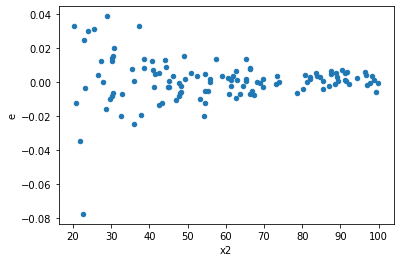

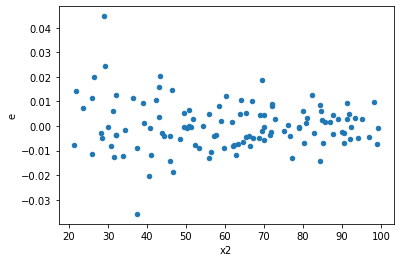

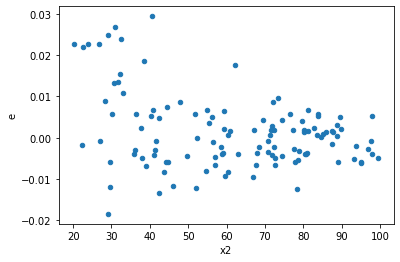

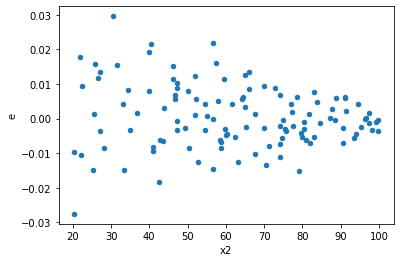

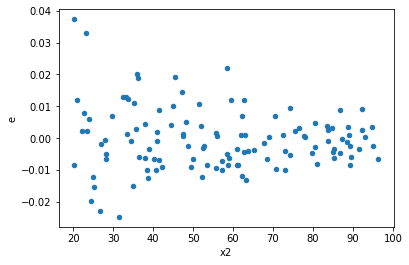

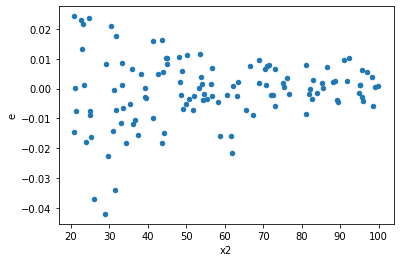

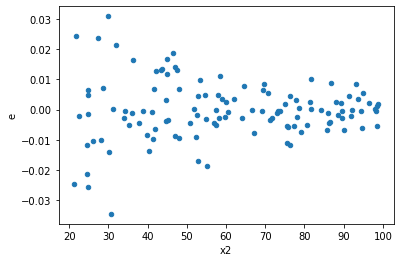

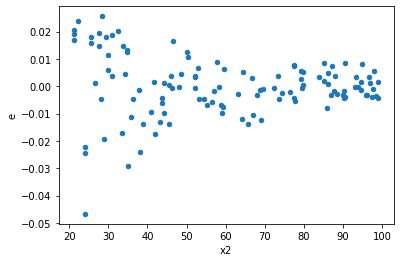

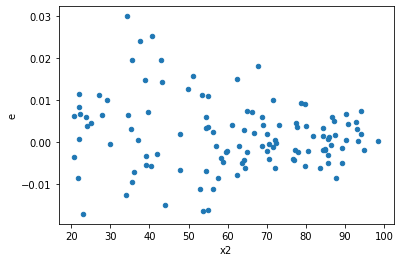

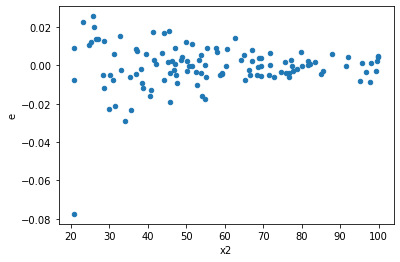

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.00888128045665651,0.0012696116278384587,0.0001930713142751415,2.7600252779096927e-05,0.1429536691285192,8.589950746921892e-10,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,0.005923706940943292,0.0018828815837280053,0.0001287762378465933,4.093220834191316e-05,0.31785528934829027,0.0001647850590416449,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.005143671973850157,0.0008702718219433963,0.00011181895595326428,1.89189526509434e-05,0.16919271414813372,1.532882431843821e-08,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.006287149317482216,0.001705007658246487,0.00013667715907570035,3.706538387492363e-05,0.27118930570099503,2.050603593776239e-05,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,0.007884259934748793,0.0013965341982660681,0.00017139695510323463,3.035943909274061e-05,0.17712939576117162,3.2720953744879636e-08,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.007024389547766256,0.0036340482638551642,0.00015270412060361426,7.90010492142427e-05,0.5173471999443404,0.027575309598133663,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,0.007505359864637522,0.001272956545397077,0.00016315999705733742,2.7672968378197324e-05,0.16960633045655507,1.5965185182986834e-08,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.010889946484469275,0.0013315294726408671,0.00023673796705367989,2.894629288349711e-05,0.12227144316455837,5.256750358048875e-11,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,0.004108008940973691,0.0014368451817940446,8.930454219508024e-05,3.1235764821609665e-05,0.34976680977074015,0.0005268177325769347,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    962
Reject001=1 : Homoscedasticity       38
Name: Result_test, dtype: int64